### Übungsblatt 6 - Rubin Mehralivand, Luis Schneck
In diesem Übungsblatt lösen wir die Lotka-Volterra Gleichung, welche die Form:
\begin{align*}
\dot{x}(t) &= x(t)(\alpha - \beta y(t)) \\
\dot{y}(t) &= y(t)(\gamma x(t) - \delta)
\end{align*}
Hierbei handelt es sich um 2 ODEs, welche gekoppelt sind in einem System.

In [257]:
import numpy as np
import matplotlib.pyplot as plt

Ich habe die rechten Seiten und Konstanten direkt an den Anfang gelegt, damit man diese ggbfs. variieren oder damit rumspielen kann, um unsere Funktionen zu testen. $f(t, \vec{z})$ beschreibt hierbei die rechte Seite der klassischen Lotka-Volterra-Gleichung und $f_\text{mod}$ die Gleichung mit der Sterblichkeitsrate. Für diese wählen wir $\epsilon = 0.5$ damit dies im Ergebnis sichtbar ist. Für $A, b, c$ wähle ich ein Butcher-Array, welches ich schon vor einem Jahr für meine Arbeit in der Regeltechnik verwendet habe, welche ein 4-stufiges, explizites Runge-Kutta-Verfahren darstellt.

In [258]:
def f(t: float, z: np.ndarray) -> np.ndarray:
    r = np.ndarray(2)
    r[0] = z[0] * (1 - z[1])
    r[1] = z[1] * (z[0] - 1)
    return r

In [259]:
eps = 0.5
def f_mod(t: float, z: np.ndarray) -> np.ndarray:
    r = np.ndarray(2)
    r[0] = z[0] * (1 - z[1]) - eps * z[0]
    r[1] = z[1] * (z[0] - 1)
    return r

In [260]:
T = np.linspace(0, 20, 1000)
A = np.array([
    [0, 0, 0, 0],
    [0.5, 0, 0, 0],
    [0, 0.5, 0, 0],
    [0, 0, 1, 1]
])
b = np.array([1/6, 1/3, 1/3, 1/6])
c = np.array([0, 0.5, 0.5, 1])
initialwert = np.array([2, 1])
initialwerte = np.array([
    [2, 1],
    [1, 2],
    [3, 1],
    [2, 2]
])

### a)
Die hier aufgestellte Funktion ist im Prinzip einfach eine Umsetzung der Darstellung aus dem Skript bzw. der VL. Für die zwei $\sum_{j = 1}^s$ innerhalb der Iterationen wähle ich die von numpy gegebene dot-product-Operation, welche mit $@$ genutzt werden kann und dazu noch die Indexnotation von numpy $[i,j]$, als auch den Splice-Operator von Python $[:]$. <br><br>

$y_m$ initialisiere ich als eine Matrix, welche jeweils $n$ Vektoren der Form $(x,y)$ speichern kann (also prinzipiell einfach eine Matrix $\subseteq \mathbb{R}^n \times \mathbb{R}^2$).
<br>$h$ wird in jedem Schritt aus $T_{m+1} - T_m$ berechnet, da $T$ streng steigend ist.
<br>Die $k_i(t_m, y_m, h)$ werden ebenfalls als Matrix $\subseteq \mathbb{R}^s \times \mathbb{R}^2$ gespeichert und pro Iteration durch $y_m$ berechnet.<br><br>

Eigentlich relativ straight forward, numpy erlaubt es, das alles relativ kompakt darzustellen.

In [261]:
# Selbstgeschriebenes Runge-Kutta-Verfahren von vor einem Jahr
def runge_kutta(f: callable, initialwert: np.ndarray, T: np.ndarray, A: np.array, b, c) -> np.ndarray:
    s = A.shape[0]
    n = T.shape[0]
    y = np.zeros((n, len(initialwert)))
    y[0] = initialwert

    for m in range(n-1):
        h = T[m+1]-T[m]
        k = np.zeros((s,len(initialwert)))

        for i in range (0, s):
            k[i] = f(T[m] + c[i] * h, y[m] + h * A[i, :] @ k[:])

        y[m+1] = y[m] + h * b[:] @ k[:]

    return y

### b)
Die Lösung ergibt intuitiv Sinn, da viele Räuber viel Beute töten, dann mehr Räuber sterben, was mehr Beute entstehen lässt, die Lösung sieht aus wie zwei Sini, welche leicht verschoben sind.

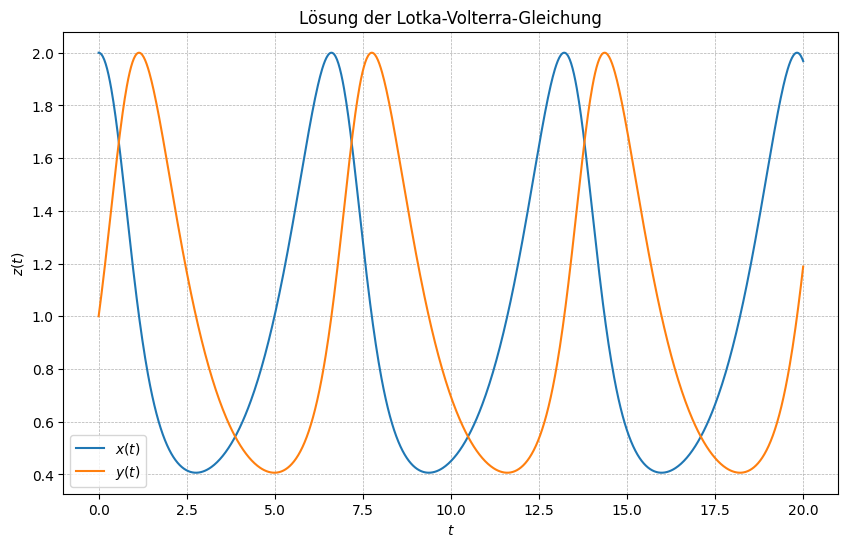

[1.96811885 1.18852627]


In [262]:
def equation_solver(initialwert, T: np.ndarray, A: np.ndarray, b: np.ndarray, c: np.ndarray) -> float:
    z = runge_kutta(f, initialwert, T, A, b, c)

    plt.figure(figsize=(10, 6))
    plt.plot(T, z[:,0], label='$x(t)$')
    plt.plot(T, z[:,1], label='$y(t)$')
    plt.xlabel("$t$")
    plt.ylabel("$z(t)$")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title("Lösung der Lotka-Volterra-Gleichung")
    plt.show()

    return z[-1]

print(equation_solver(initialwert, T, A, b, c))


### c)
Das Phasenportrait zeigt, wie Räuber und Beute zueinander stehen, modelliert also alle Zustände, welches das System einnehmen kann. Offensichtlich ist das hier ellipsenförmig. Wieso der erste und zweite Plot identisch sind liegt wahrscheinlich an der Symmetrie des Systems.

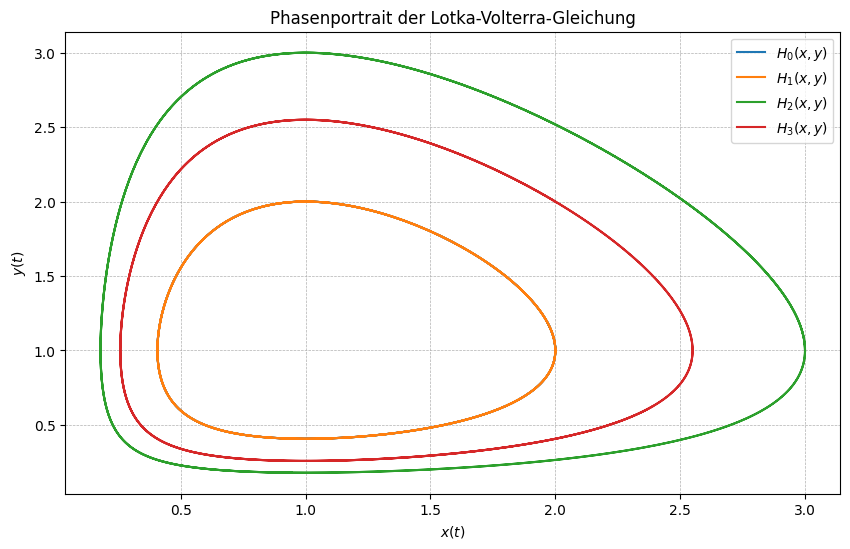

In [263]:
def phase_portrait(initialwerte, T: np.ndarray, A: np.ndarray, b: np.ndarray, c: np.ndarray):
    plt.figure(figsize=(10, 6))
    i = 0
    for initialwert in initialwerte:
        z = runge_kutta(f, initialwert, T, A, b, c)

        plt.plot(z[:,0], z[:,1], label=f'$H_{i}(x,y)$')
        plt.xlabel("$x(t)$")
        plt.ylabel("$y(t)$")
        plt.legend()
        plt.grid(True, which="both", linestyle="--", linewidth=0.5)
        plt.title("Phasenportrait der Lotka-Volterra-Gleichung")
        i += 1

    plt.show()

phase_portrait(initialwerte, T, A, b, c)

### d)
Modellieren wir nun $f_\text{mod}$, so sehen wir, dass die Lösung für die Population der Beute leicht nach unten verschoben ist und auch wesentlich länger abnimmt, falls die Population der Räuber steigt. Für das modellieren hab ich ein neues Interface geschrieben bzw. das alte recycled.

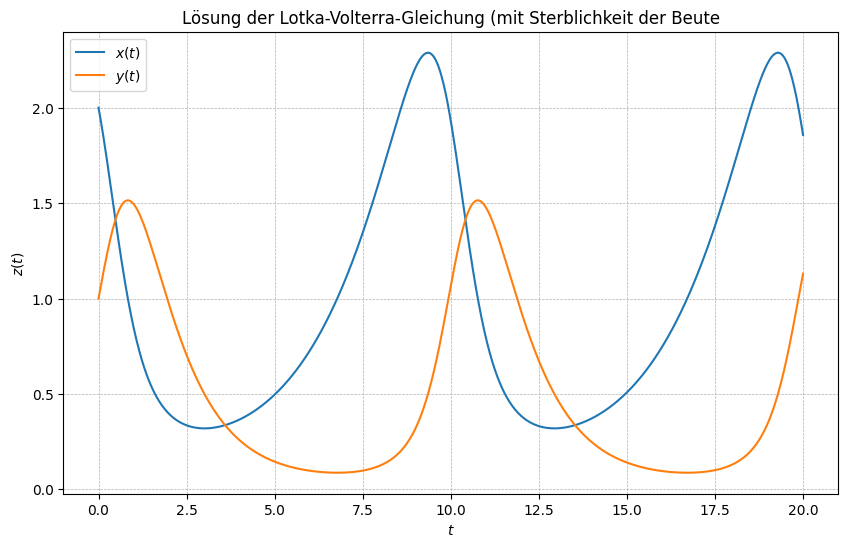

[1.85696565 1.12989196]


In [264]:
def loss_equation_solver(initialwert, T: np.ndarray, A: np.ndarray, b: np.ndarray, c: np.ndarray) -> float:
    z = runge_kutta(f_mod, initialwert, T, A, b, c)

    plt.figure(figsize=(10, 6))
    plt.plot(T, z[:,0], label='$x(t)$')
    plt.plot(T, z[:,1], label='$y(t)$')
    plt.xlabel("$t$")
    plt.ylabel("$z(t)$")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title("Lösung der Lotka-Volterra-Gleichung (mit Sterblichkeit der Beute")
    plt.show()

    return z[-1]


print(loss_equation_solver(initialwert, T, A, b, c))

### e)
Wir sehen, dass $H(x,y)$ konstant ist. Dies liegt daran, dass $H(x,y)$ ähnlich zur Hamiltonfunktion bzw. Hamilton-Formalismus aus der Physik ist. Man kann das System als ein System mit holonom-skleronomen (ganzheitlich und zeitunabhängigen) Zwangsbedingungen ansehen, die Population von Räuber und Beute hängt also nur vom jeweils anderem ab. Sind alle Zwangsbedingungen holonom-skleronom und dazu die Zeit homogen (also das System ist translationsinvariant in der Zeit), dann gilt:
\begin{align*}
H &= E \\
\partial_t H(x,y,t) &= \partial_t H(x,y) = 0
\end{align*}
Wobei $E$ eine Konstante ist, die von den Anfangswerten abhängt. <br><br>
Im Plot sehen wir, dass $H(x,y)$ etwas schwankt und auch leicht steigend zu sein scheint, sie wird also nicht ganz perfekt erhalten. Allerdings ist die Steigung so gering, dass man in diesem Falle prinzipiell von einer relativ guten Erhaltung ausgehen könnte. Ganz simplektisch scheint die Runge-Kutta-Methode also nicht zu sein.

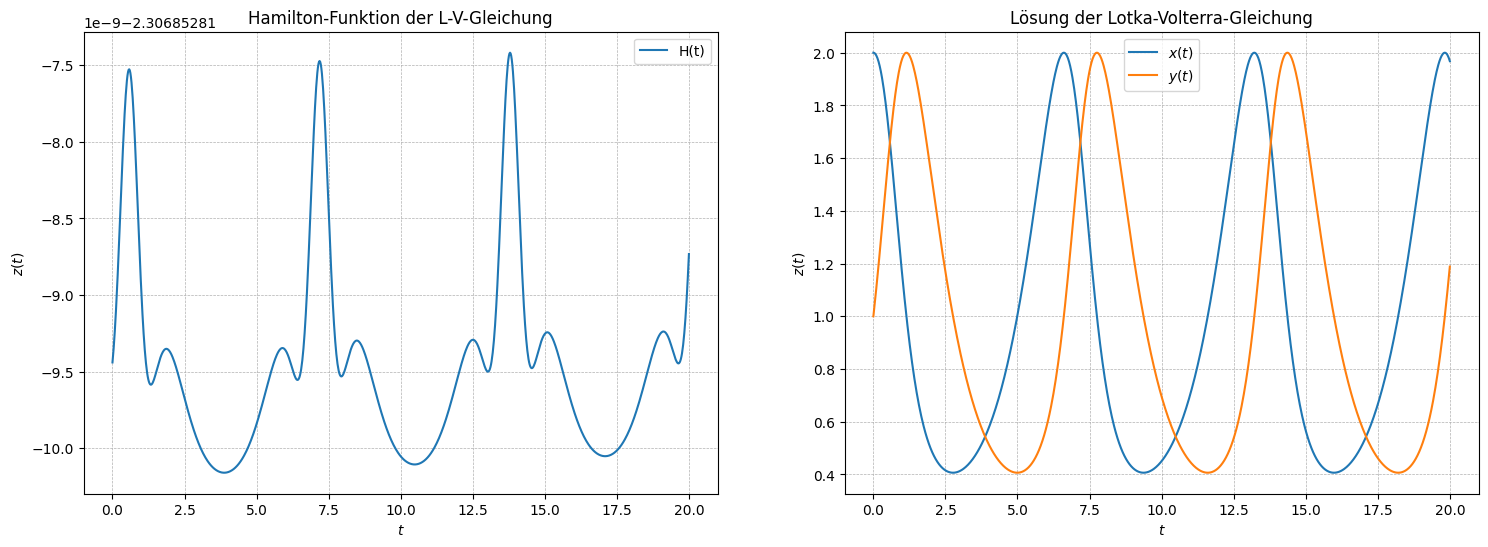

-2.3068528187324286

In [265]:
def H(x: float, y:float) -> float:
    return np.log(x) - x + np.log(y) - y


def runge_kutta_hamiltonian(f: callable, initialwert: np.array, T: np.ndarray, A: np.array, b, c) -> tuple:
    s = A.shape[0]
    n = T.shape[0]
    y = np.zeros((n, len(initialwert)))
    hamiltonian = np.zeros(n)
    y[0] = initialwert
    hamiltonian[0] = H(initialwert[0], initialwert[1])

    for m in range(n-1):
        h = T[m+1]-T[m]
        k = np.zeros((s,len(initialwert)))

        for i in range (0, s):
            k[i] = f(T[m] + c[i] * h, y[m] + h * A[i, :] @ k[:])

        y[m+1] = y[m] + h * b[:] @ k[:]
        hamiltonian[m+1] = H(y[m+1, 0], y[m+1, 1])

    return y, hamiltonian


def hamiltonian_equation_solver(initialwert, T: np.ndarray, A: np.ndarray, b: np.ndarray, c: np.ndarray) -> float:
    z, hamiltonian = runge_kutta_hamiltonian(f, initialwert, T, A, b, c)

    plt.figure(figsize=(18, 6))
    plt.subplot(1,2,1)
    plt.plot(T, hamiltonian, label='H(t)')
    plt.xlabel("$t$")
    plt.ylabel("$z(t)$")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title("Hamilton-Funktion der L-V-Gleichung")

    plt.subplot(1,2,2)
    plt.plot(T, z[:,0], label='$x(t)$')
    plt.plot(T, z[:,1], label='$y(t)$')
    plt.xlabel("$t$")
    plt.ylabel("$z(t)$")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.title("Lösung der Lotka-Volterra-Gleichung")
    plt.show()
    plt.show()

    return hamiltonian[-1]


hamiltonian_equation_solver(initialwert, T, A, b, c)